In [1]:
import pandas as pd
import numpy as np
# Morning 
train_Time_Morning = np.array([pd.datetime(2016, 7, 18, 6, 0, 0), pd.datetime(2016, 7, 18, 9, 40, 0)])
test_Time_Morning = np.array([pd.datetime(2016, 10, 11, 6, 0, 0), pd.datetime(2016, 10, 11, 9, 40, 0)])
# AfterNoon
train_Time_AfterNoon = np.array([pd.datetime(2016, 7, 18, 15, 0, 0), pd.datetime(2016, 7, 18, 18, 40, 0)])
test_Time_AfterNoon = np.array([pd.datetime(2016, 10, 11, 15, 0, 0), pd.datetime(2016, 10, 11, 18, 40, 0)])

In [2]:
import util as util

In [3]:
train = pd.read_csv("C:/Users/Administrator/PycharmProjects/Traffic/Data/training_20min_avg_travel_time-Copy1.csv")
train['start_time'] = train['time_window'].apply(lambda x :(x.split(','))[0][1:])
train['start_time'] = pd.to_datetime(train['start_time'])
# Turn A,B,C to 1,2,3
train.replace('B',2,inplace=True)
train.replace('A',1,inplace=True)
train.replace('C',3,inplace=True)
train.drop(['time_window'],axis=1,inplace=True)

In [4]:
def CompareMA(inter,tog):
    ts33M = util.TsList(train,inter,tog,train_Time_Morning)
    ts33M = pd.DataFrame(ts33M)
    ts33M.drop(0,inplace=True)
    util.DrawTsList(ts33M)
    # index = util.ExceptOutlier(ts)
    # util.DrawTsList(t_s.ix[index])
    ts33A = util.TsList(train,inter,tog,train_Time_AfterNoon)
    ts33A = pd.DataFrame(ts33A)
    ts33A.drop(0,inplace=True)
    util.DrawTsList(ts33A)

d:\python64\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


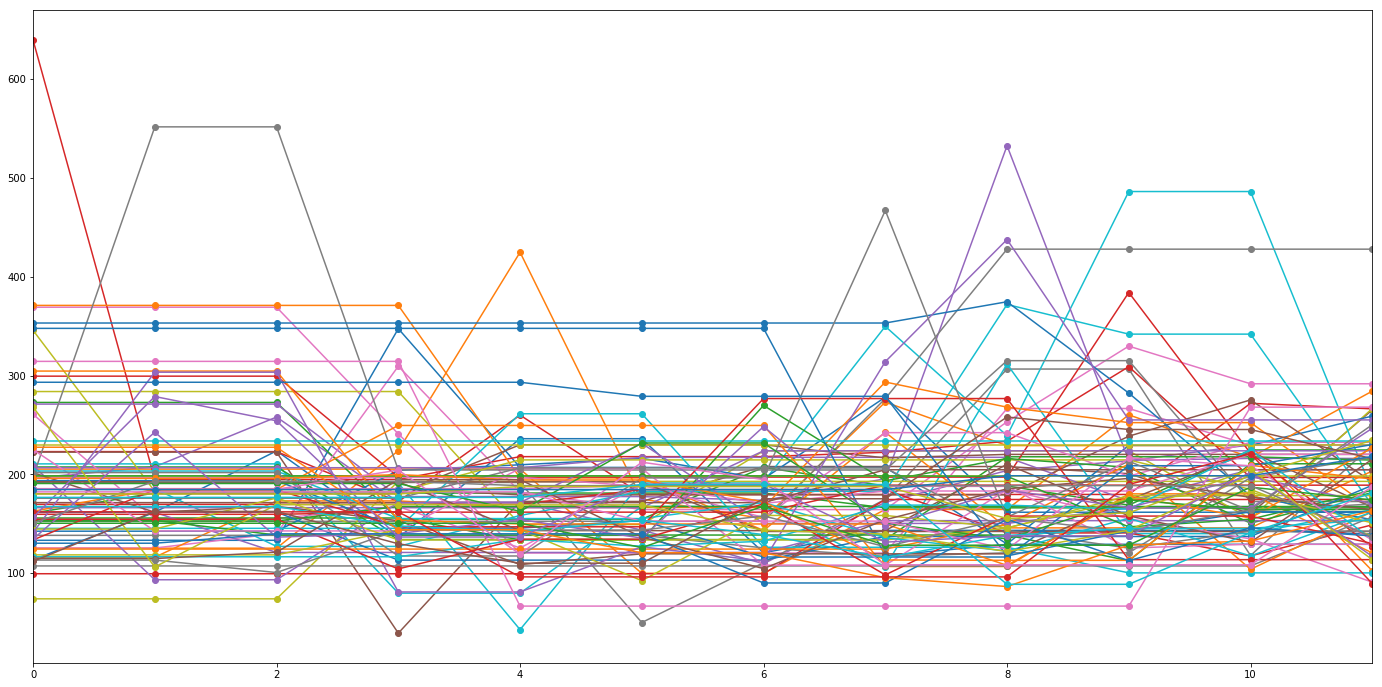

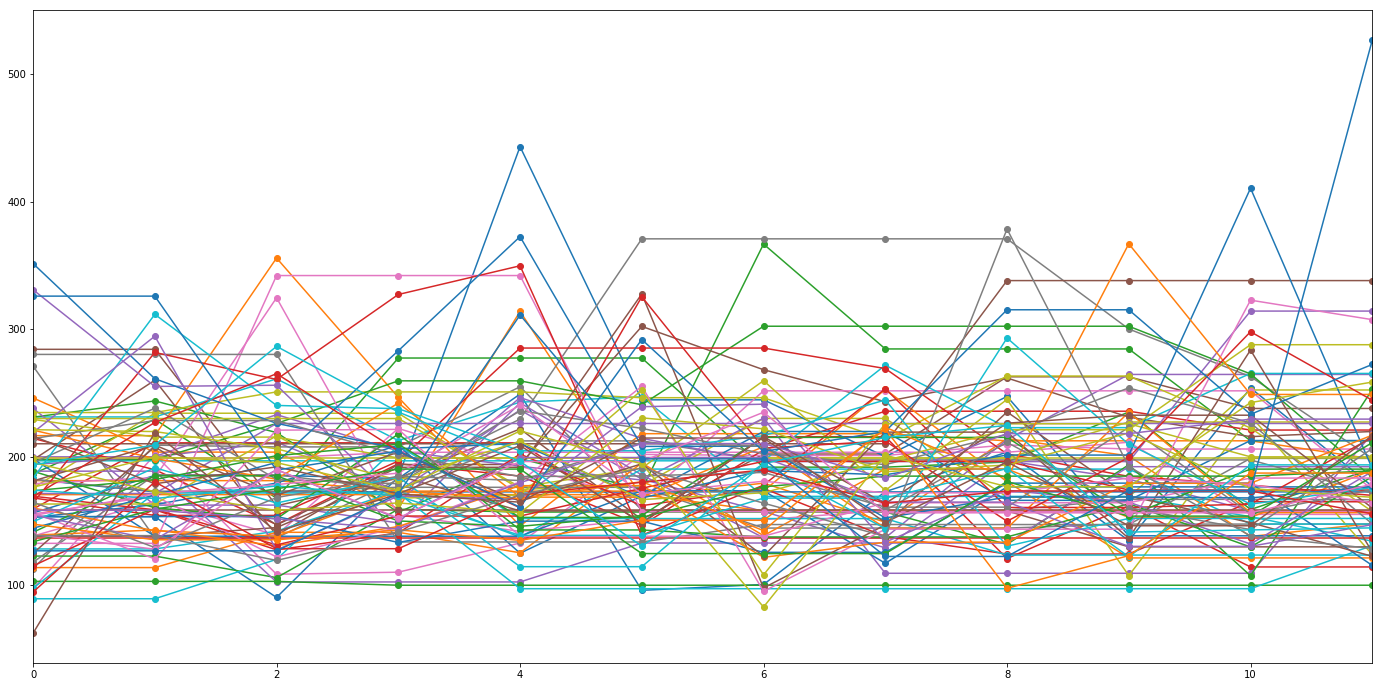

In [5]:
CompareMA(3,3)

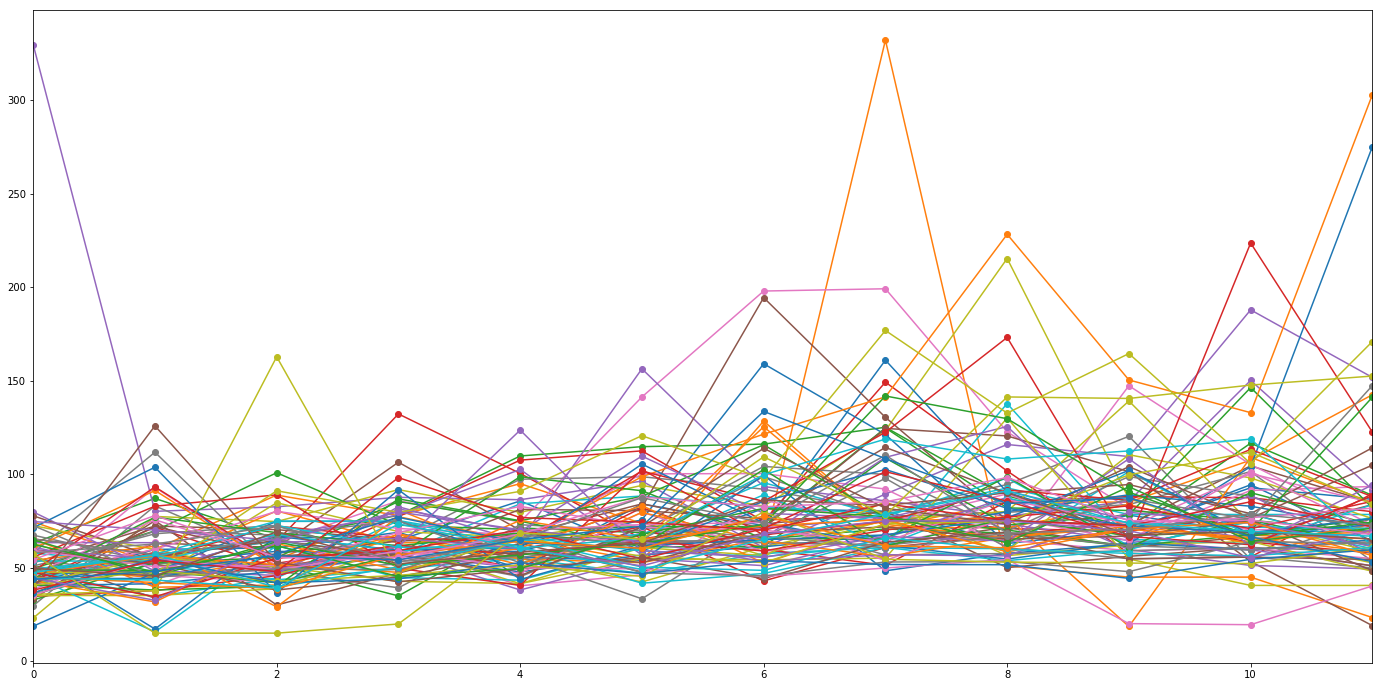

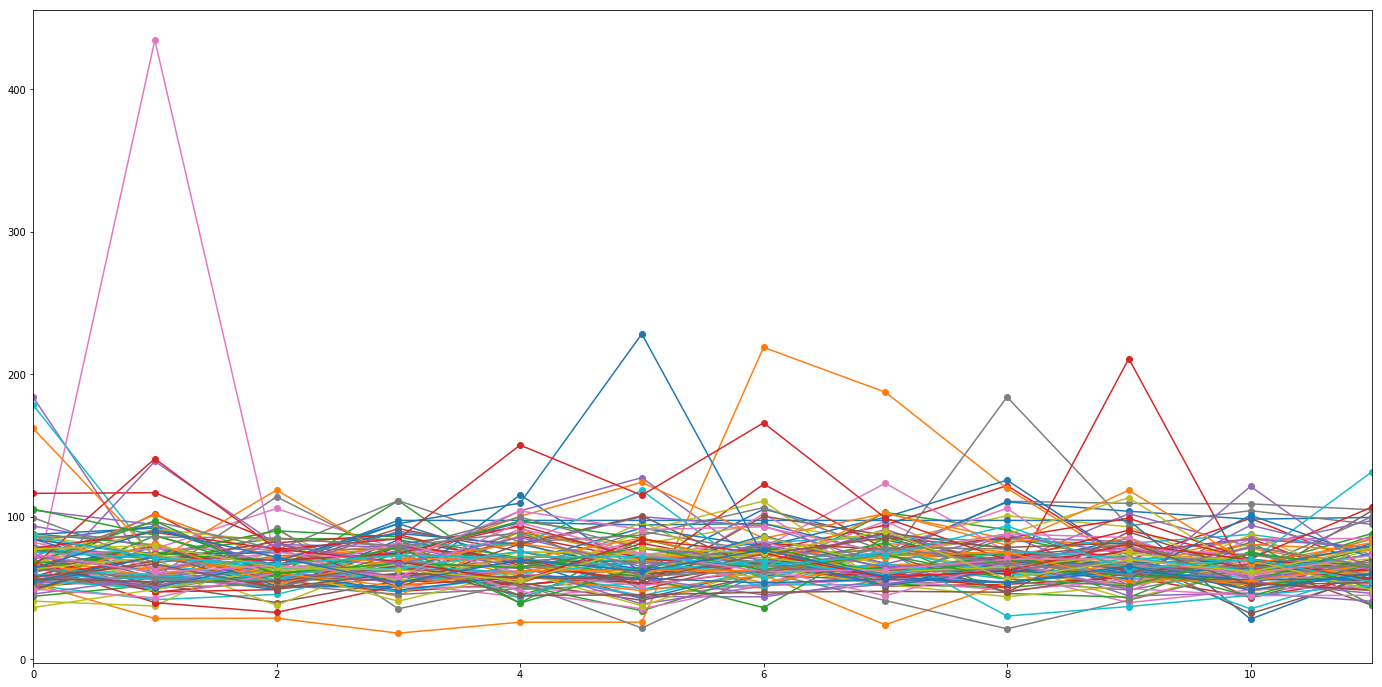

In [6]:
CompareMA(1,2)

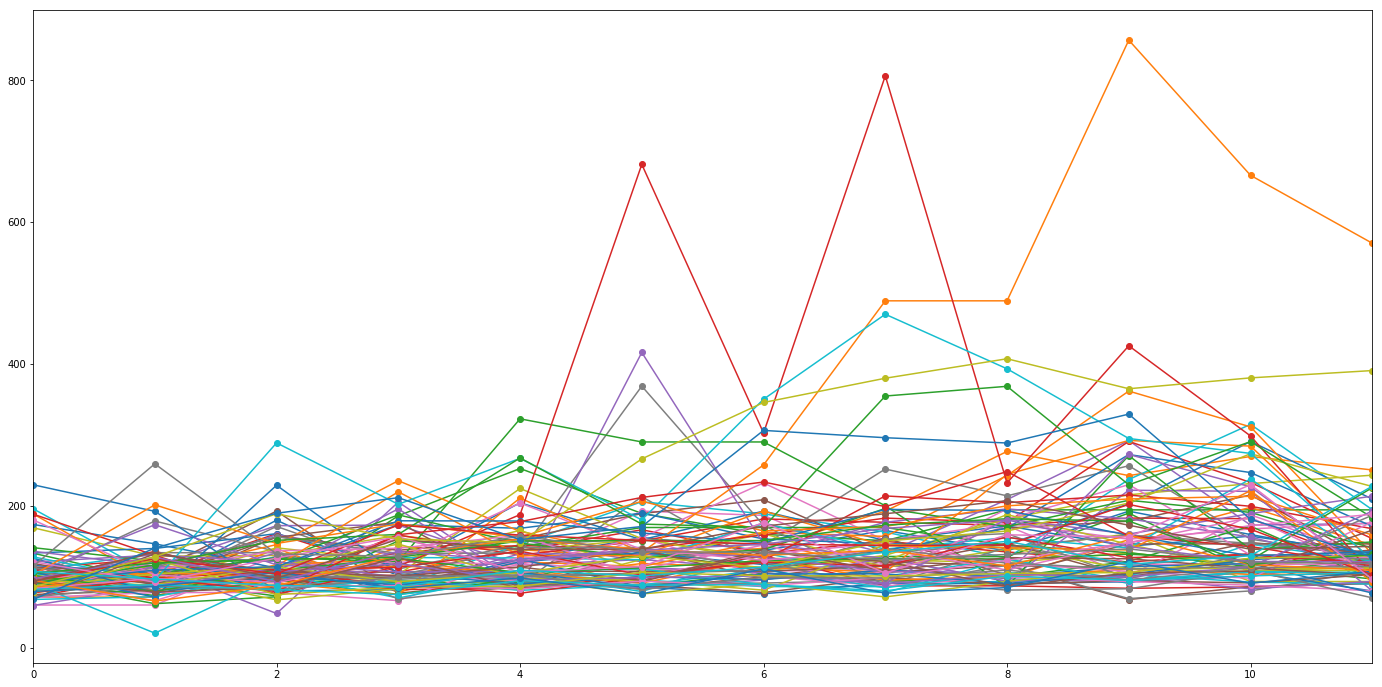

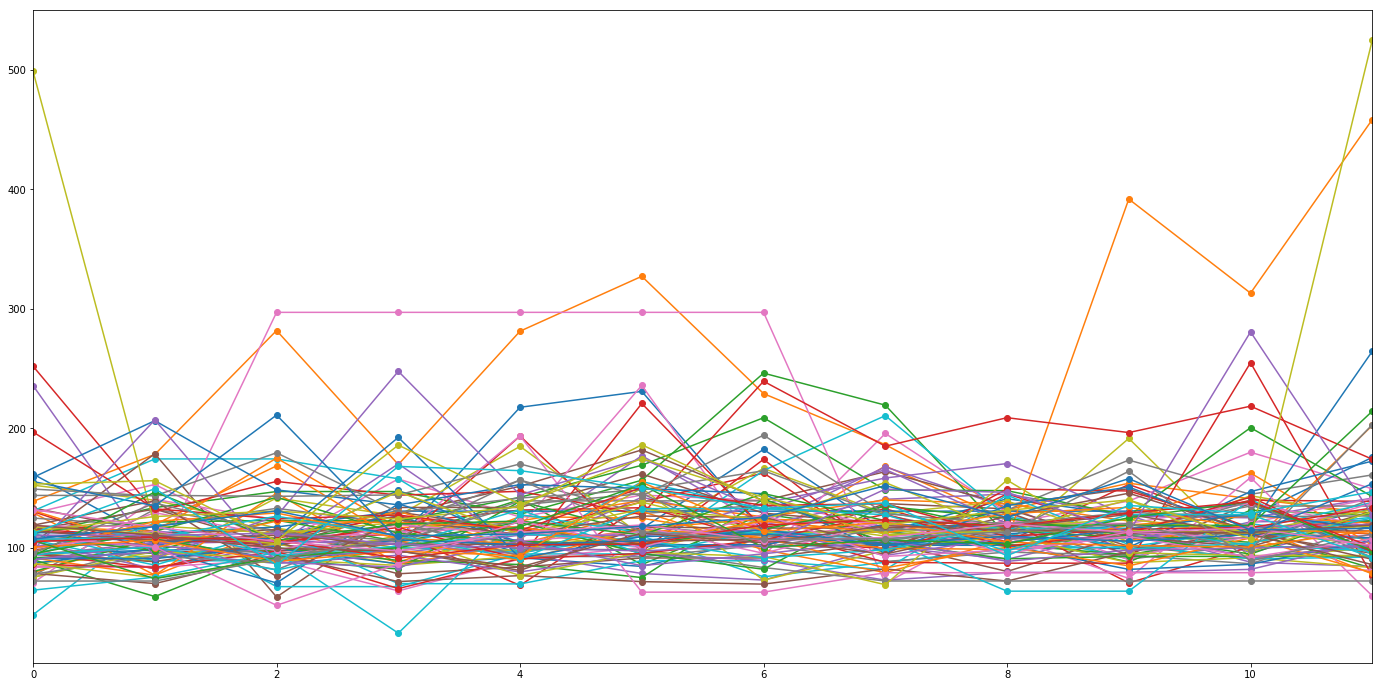

In [7]:
CompareMA(1,3)

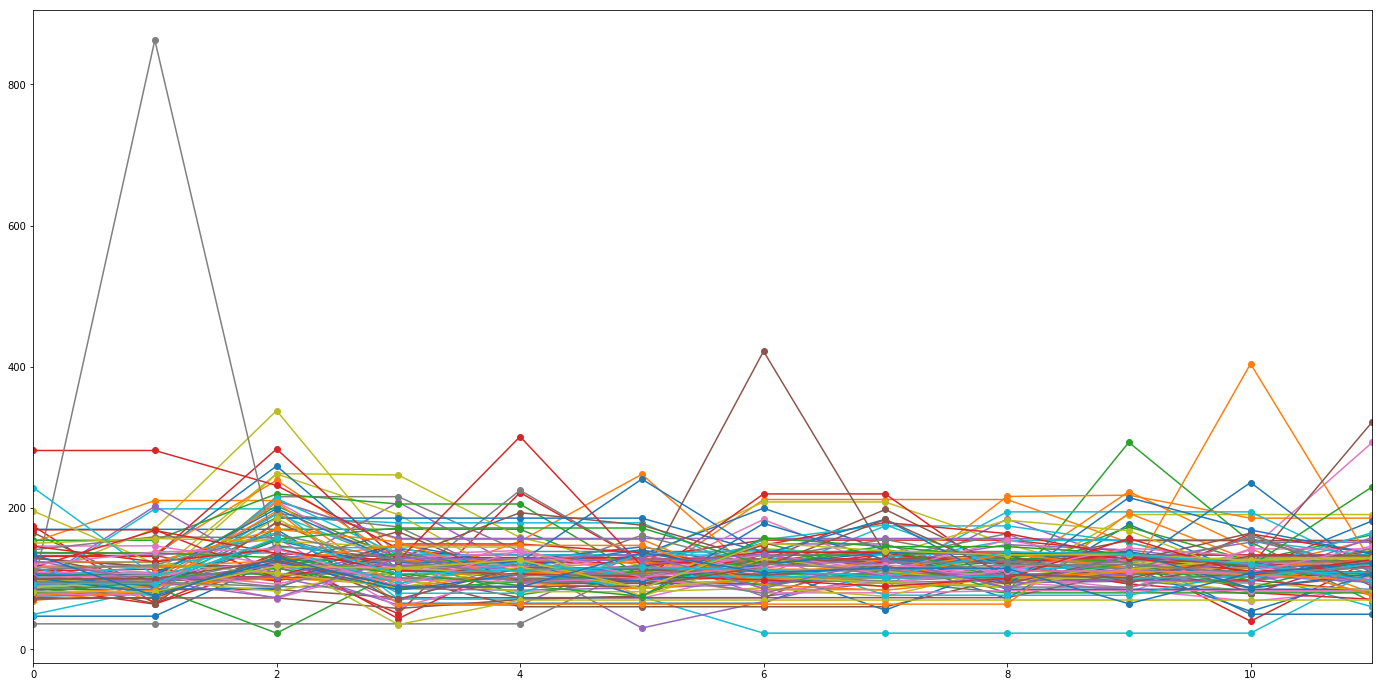

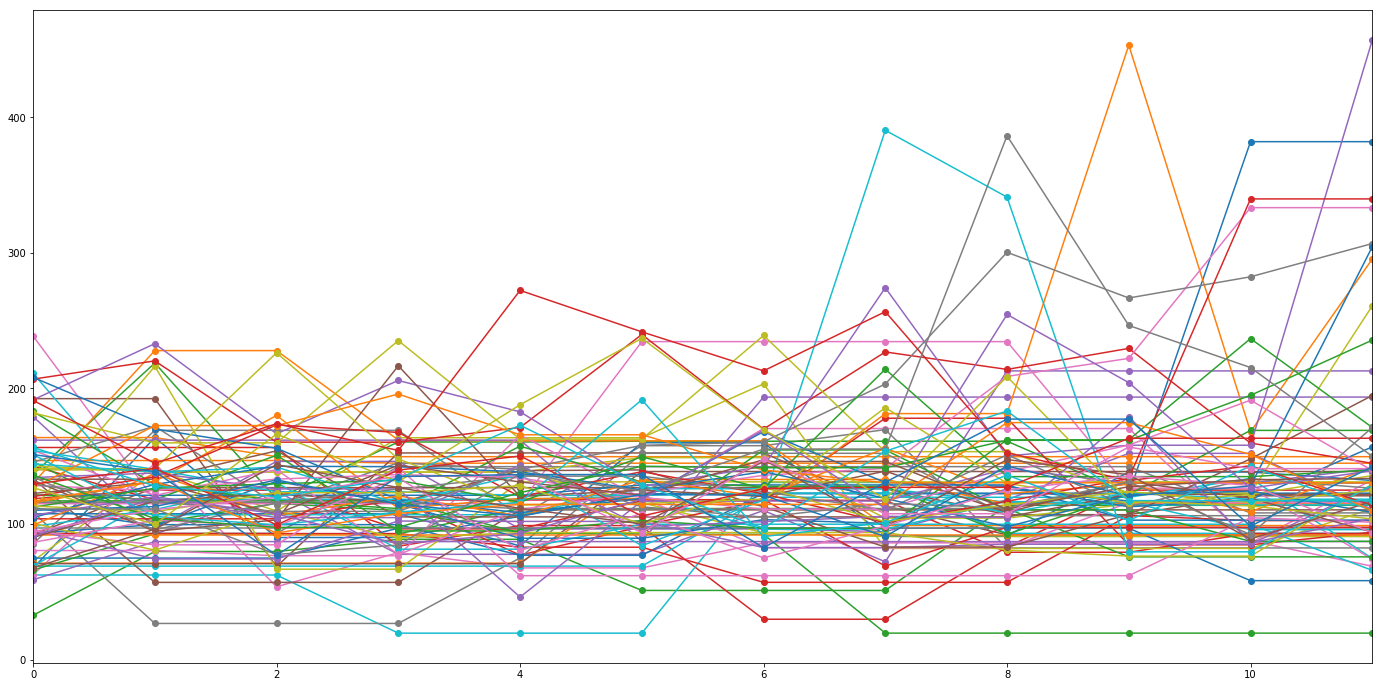

In [8]:
CompareMA(2,1)

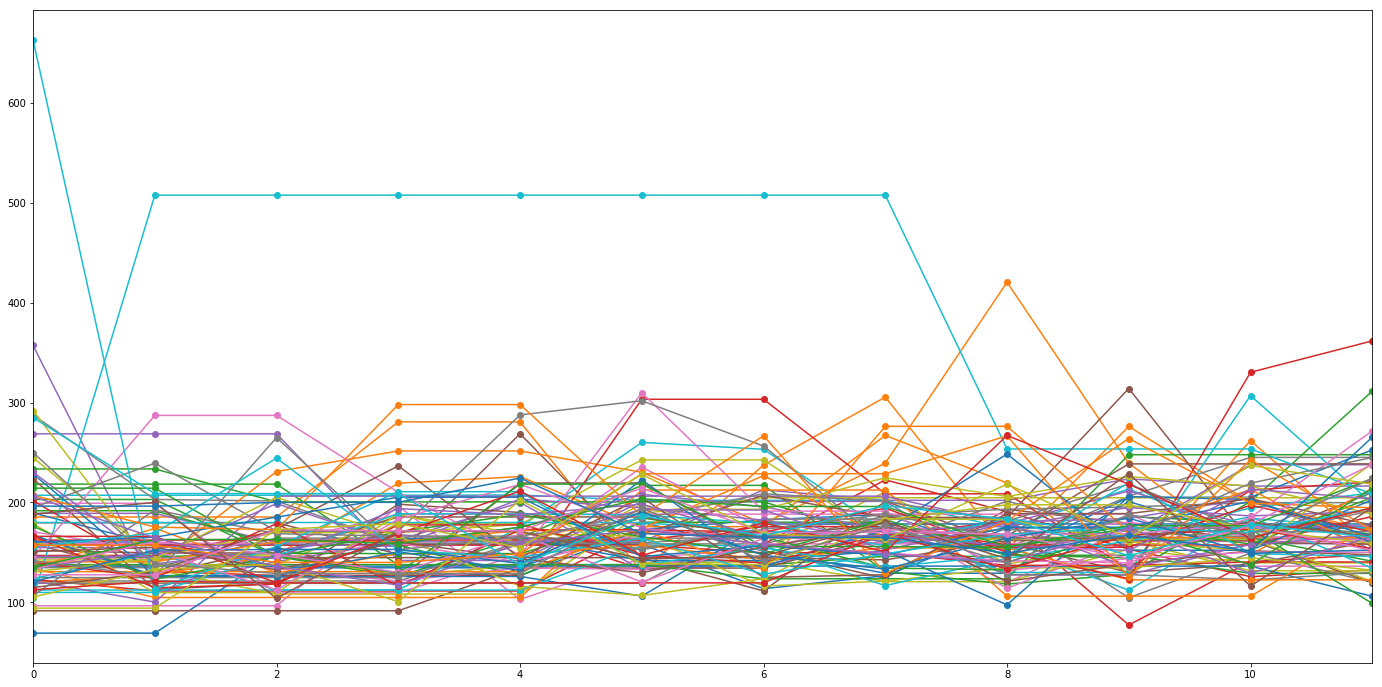

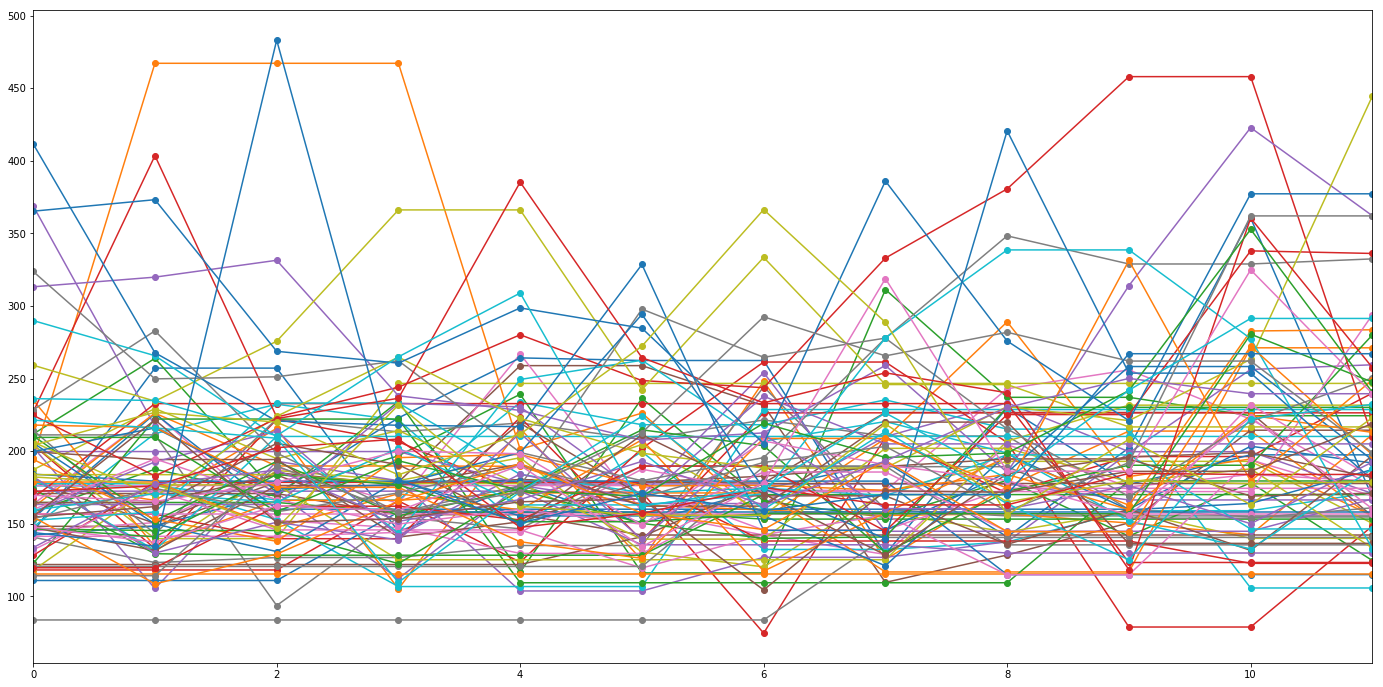

In [9]:
CompareMA(3,1)

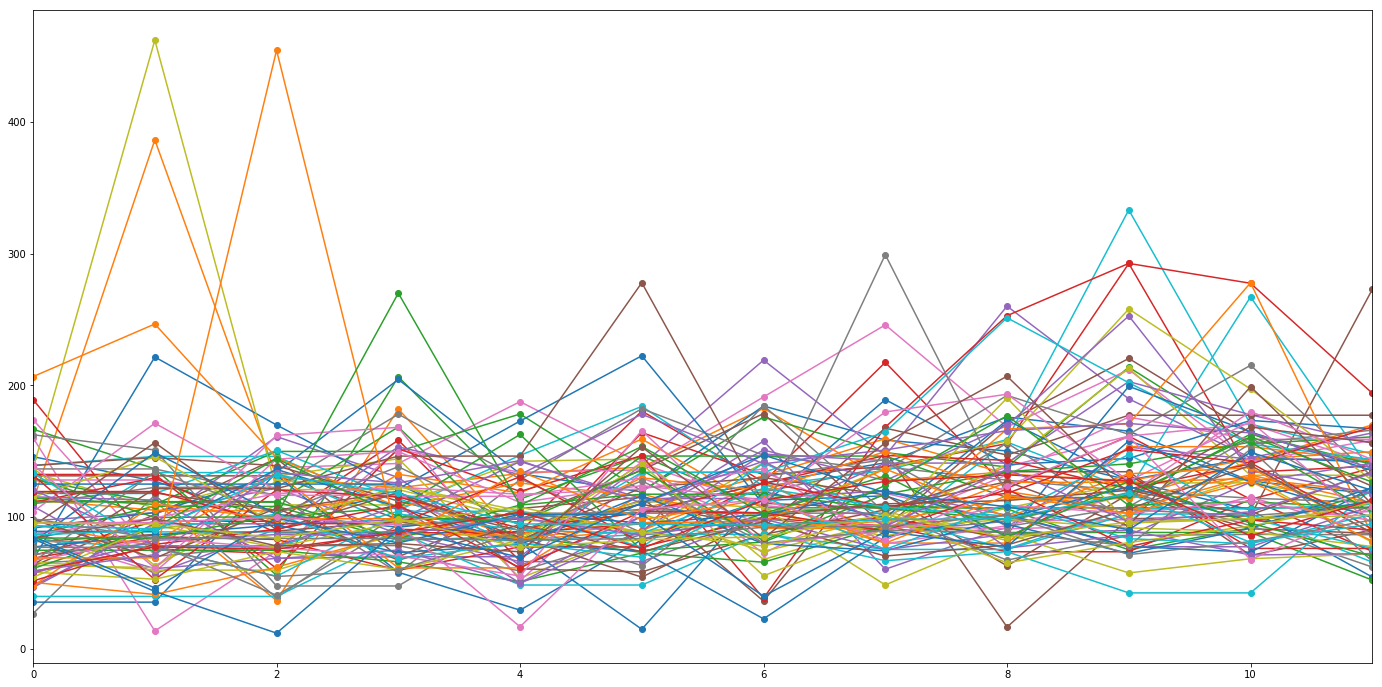

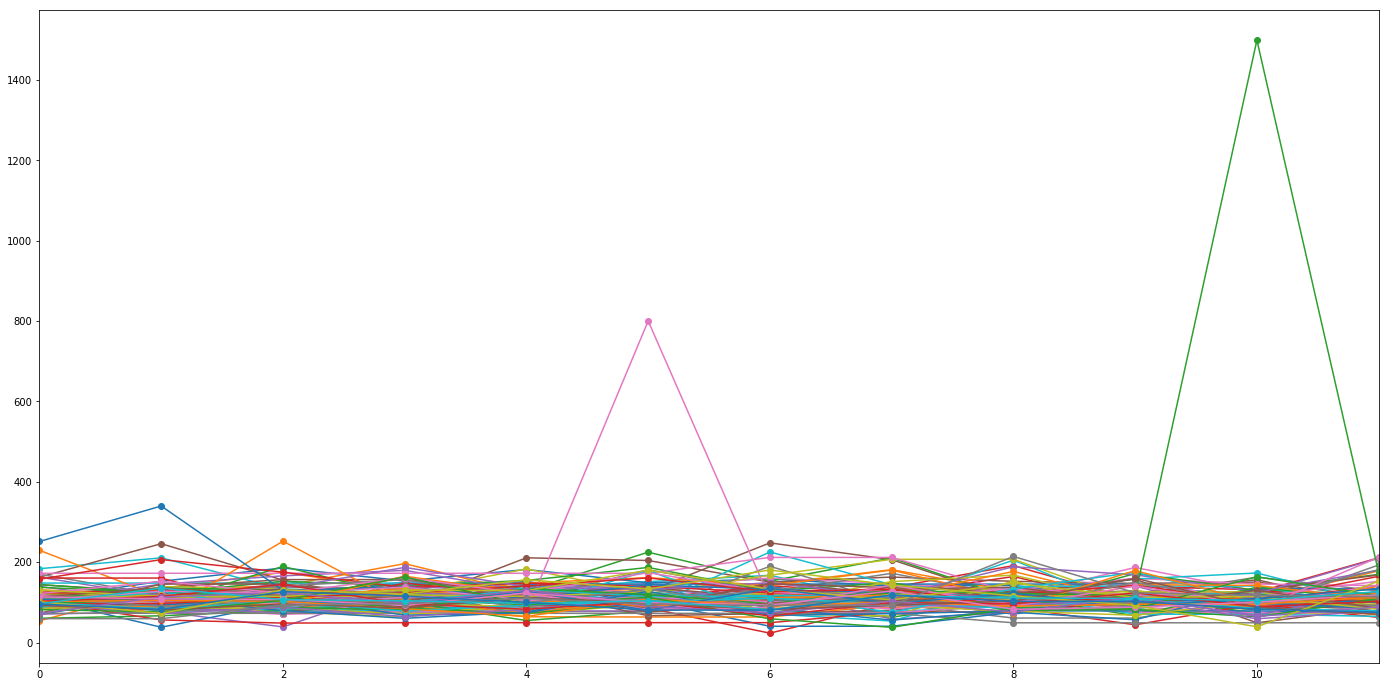

In [10]:
CompareMA(2,3)

In [11]:
train_weather = pd.read_csv("C:/Users/Administrator/PycharmProjects/Traffic/Data/weather (table 7)_training_update.csv")
test_weather = pd.read_csv("C:/Users/Administrator/PycharmProjects/Traffic/Data/weather (table 7)_test1.csv")

In [12]:
train_hour6 = train_weather[train_weather['hour'] == 6]
train_hour9 = train_weather[train_weather['hour'] == 9]
train_hour15 = train_weather[train_weather['hour'] == 15]
train_hour18 = train_weather[train_weather['hour'] == 18]

test_hour6 = test_weather[test_weather['hour'] == 6]
test_hour9 = test_weather[test_weather['hour'] == 9]
test_hour15 = test_weather[test_weather['hour'] == 15]
test_hour18 = test_weather[test_weather['hour'] == 18]

In [13]:
train_Morning_weather = train_hour6.merge(train_hour9,how='outer')
train_Afternoon_weather = train_hour15.merge(train_hour18,how='outer')

test_Morning_weather = test_hour6.merge(test_hour9,how='outer')
test_Afternoon_weather = test_hour15.merge(test_hour18,how='outer')

In [66]:
train_weather

date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0    2016-07-01    15    1000.0        1004.8           102.0         1.6   
1    2016-07-02    15    1002.4        1007.3           138.0         1.0   
2    2016-07-03    15    1002.2        1007.1           173.0         0.4   
3    2016-07-04    15    1001.1        1005.9           188.0         1.3   
4    2016-07-05    15    1006.8        1011.7           224.0         2.0   
5    2016-07-06    15    1006.4        1011.2           326.0         1.9   
6    2016-07-07    15    1002.9        1007.7            47.0         2.1   
7    2016-07-08    15    1000.4        1005.2            62.0         3.6   
8    2016-07-09    15     998.5        1003.3            89.0         3.0   
9    2016-07-10    15     996.4        1001.2            45.0         1.6   
10   2016-07-11    15     995.8        1000.6           206.0         1.3   
11   2016-07-12    15     996.1        1000.9           213.0         1.5   
12   2016-07-13    15     999.2        1004.0           327.0         0.9   
13   2016-07-14    15     998.7        1003.5           309.0         1.4   
14   2016-07-15    15     995.6        1000.4           227.0         2.1   
15   2016-07-16    15    1003.0        1007.9           220.0         1.0   
16   2016-07-17    15    1002.3        1007.1            61.0         1.3   
17   2016-07-18    15    1001.2        1006.0           183.0         1.0   
18   2016-07-19    15    1001.0        1005.8           202.0         1.5   
19   2016-07-20    15    1001.3        1006.1           208.0         2.1   
20   2016-07-21    15    1001.9        1006.7           208.0         3.2   
21   2016-07-22    15    1001.7        1006.5           190.0         1.6   
22   2016-07-23    15    1001.9        1006.6           150.0         1.2   
23   2016-07-24    15    1003.0        1007.7           190.0         1.4   
24   2016-07-25    15    1001.9        1006.7           271.0         0.6   
25   2016-07-26    15    1000.6        1005.4           352.0         0.7   
26   2016-07-27    15    1000.7        1005.5           221.0         2.0   
27   2016-07-28    15    1001.5        1006.2           169.0         1.8   
28   2016-07-29    15    1002.2        1007.0           184.0         1.5   
29   2016-07-30    15    1003.0        1007.8            57.0         1.9   
..          ...   ...       ...           ...             ...         ...   
402  2016-09-17     9    1005.4        1010.3           350.0         4.1   
403  2016-09-18     9    1004.4        1009.3           359.0         5.2   
404  2016-09-19     9    1008.3        1013.3           351.0         5.3   
405  2016-09-20     9    1012.6        1017.6            11.0         4.5   
406  2016-09-21     9    1013.2        1018.2           348.0         1.5   
407  2016-09-22     9    1010.6        1015.6            91.0         2.6   
408  2016-09-23     9    1008.2        1013.2            96.0         4.5   
409  2016-09-24     9    1006.3        1011.2            78.0         5.2   
410  2016-09-25     9    1006.6        1011.5            57.0         2.8   
411  2016-09-26     9    1005.6        1010.5            81.0         2.6   
412  2016-09-27     9    1004.6        1009.5           104.0         4.2   
413  2016-09-28     9    1004.2        1009.1            53.0         5.1   
414  2016-09-29     9    1006.4        1011.4           356.0         4.0   
415  2016-09-30     9    1006.2        1011.2            16.0         3.5   
416  2016-10-01     9    1007.5        1012.4            99.0         1.1   
417  2016-10-02     9    1004.1        1009.0           235.0         1.4   
418  2016-10-03     9    1006.2        1011.2            44.0         3.6   
419  2016-10-04     9    1005.1        1010.1           327.0         1.5   
420  2016-10-05     9    1009.4        1014.4            52.0         2.8   
421  2016-10-06     9    1014.2        1019.2            64.0         3.2   
422  20

In [25]:
train['start_time']= pd.to_datetime(train['start_time'])
train['date'] = train['start_time'].apply(lambda x : x.date())
train['hour'] = train['start_time'].apply(lambda x : x.hour)

In [35]:
train_weather = train_Afternoon_weather.merge(train_Morning_weather,how='outer')

In [69]:
for intersection_id,intersection_id_group in train.groupby(['intersection_id']):
        for tollgate_id,tollgate_id_group  in intersection_id_group.groupby(['tollgate_id']):
            if intersection_id == 1 and tollgate_id ==3:
                tollgate_id_group

In [70]:
tollgate_id_group

intersection_id  tollgate_id  avg_travel_time          start_time  \
19278                3            3           113.54 2016-07-19 00:40:00   
19279                3            3           161.74 2016-07-19 06:20:00   
19280                3            3           223.81 2016-07-19 06:40:00   
19281                3            3           135.92 2016-07-19 07:00:00   
19282                3            3           236.12 2016-07-19 07:20:00   
19283                3            3           120.73 2016-07-19 08:00:00   
19284                3            3           143.37 2016-07-19 08:20:00   
19285                3            3           139.70 2016-07-19 09:40:00   
19286                3            3           139.70 2016-07-19 10:00:00   
19287                3            3           114.25 2016-07-19 10:20:00   
19288                3            3           225.10 2016-07-19 12:40:00   
19289                3            3           180.09 2016-07-19 13:20:00   
19290                3            3           174.84 2016-07-19 14:00:00   
19291                3            3           191.57 2016-07-19 14:20:00   
19292                3            3           222.44 2016-07-19 14:40:00   
19293                3            3           156.10 2016-07-19 15:00:00   
19294                3            3           185.51 2016-07-19 15:20:00   
19295                3            3           183.07 2016-07-19 16:00:00   
19296                3            3           249.18 2016-07-19 16:20:00   
19297                3            3            95.50 2016-07-19 16:40:00   
19298                3            3           100.09 2016-07-19 17:00:00   
19299                3            3           172.78 2016-07-19 17:20:00   
19300                3            3           203.77 2016-07-19 17:40:00   
19301                3            3           134.43 2016-07-19 18:00:00   
19302                3            3           254.01 2016-07-19 18:20:00   
19303                3            3           176.96 2016-07-19 18:40:00   
19304                3            3           208.12 2016-07-19 19:00:00   
19305                3            3           219.38 2016-07-19 19:20:00   
19306                3            3           265.64 2016-07-19 20:20:00   
19307                3            3           184.96 2016-07-19 21:00:00   
...                ...          ...              ...                 ...   
21824                3            3           151.08 2016-10-16 21:00:00   
21825                3            3           121.35 2016-10-16 22:20:00   
21826                3            3           261.92 2016-10-16 23:00:00   
21827                3            3           184.64 2016-10-17 00:20:00   
21828                3            3           198.63 2016-10-17 08:40:00   
21829                3            3           218.18 2016-10-17 09:40:00   
21830                3            3           220.20 2016-10-17 10:00:00   
21831                3            3           149.87 2016-10-17 10:40:00   
21832                3            3           104.38 2016-10-17 12:00:00   
21833                3            3           142.40 2016-10-17 12:20:00   
21834                3            3           149.15 2016-10-17 12:40:00   
21835                3            3           169.18 2016-10-17 13:20:00   
21836                3            3           149.21 2016-10-17 13:40:00   
21837                3            3           150.72 2016-10-17 14:20:00   
21838                3            3           191.02 2016-10-17 14:40:00   
21839                3            3           126.44 2016-10-17 15:00:00   
21840                3            3           171.02 2016-10-17 16:00:00   
21841                3            3           311.18 2016-10-17 16:20:00   
21842                3            3           198.46 2016-10-17 16:40:00   
21843                3            3           122.02 2016-10-17 17:20:00   
21844                3            3           173.74 20

In [71]:
tollgate_id_group = train_weather.merge(tollgate_id_group,how='right')

In [72]:
tollgate_id_group.dropna(inplace=True)

In [73]:
tollgate_id_group

Empty DataFrame
Columns: [date, hour, pressure, sea_pressure, wind_direction, wind_speed, temperature, rel_humidity, precipitation, intersection_id, tollgate_id, avg_travel_time, start_time]
Index: []